# Intro

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

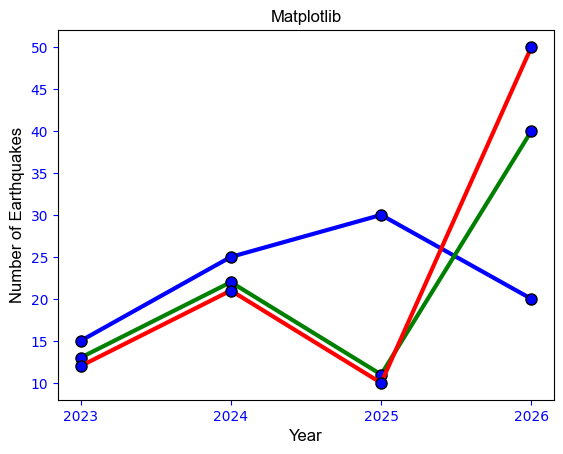

In [41]:
x = np.array([2023,2024,2025,2026])
y1 = np.array([15,25,30,20])
y2 = np.array([13,22,11,40])
y3 = np.array([12,21,10,50])

plt.title("Matplotlib",fontsize=12,family="arial")

plt.xlabel("Year",fontsize=12,family="arial")
plt.ylabel("Number of Earthquakes",fontsize=12,family="arial")


line_style = dict(marker='o',markersize=8,markerfacecolor='blue',markeredgecolor='black',linewidth=3)

plt.tick_params(axis="both",colors='blue')

plt.plot(x,y1,color='blue',**line_style)
plt.plot(x,y2,color='green',**line_style)
plt.plot(x,y3,color='red',**line_style)

plt.xticks(x)

plt.show()

# Grid

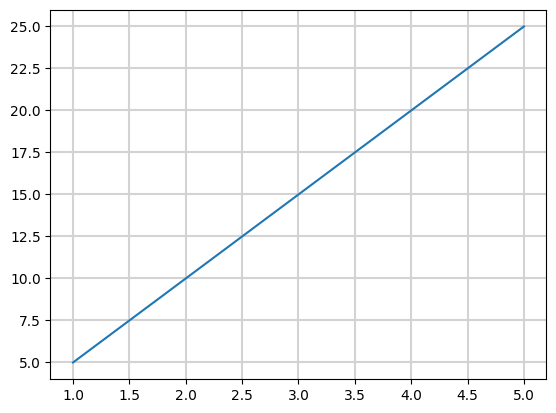

In [46]:
x = [1,2,3,4,5]
y = [5,10,15,20,25]

plt.grid(linewidth=1.5,color="lightgray")

plt.plot(x,y)
plt.show()

# Barchart

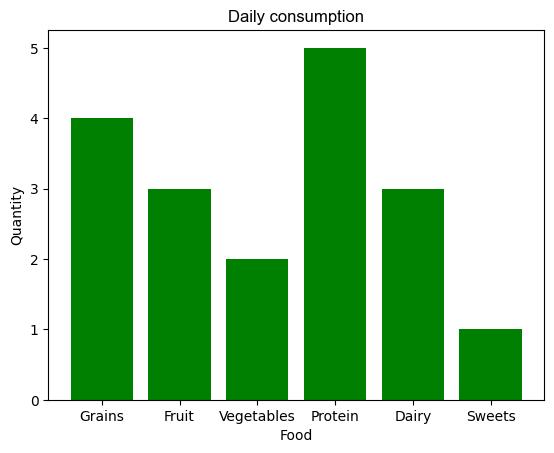

In [53]:
categories = ["Grains","Fruit","Vegetables","Protein","Dairy","Sweets"]
values = np.array([4,3,2,5,3,1])

plt.bar(categories,values,color="green")

plt.title("Daily consumption",fontsize=12,family="arial")
plt.xlabel("Food")
plt.ylabel("Quantity")

plt.show()



# Pie Charts

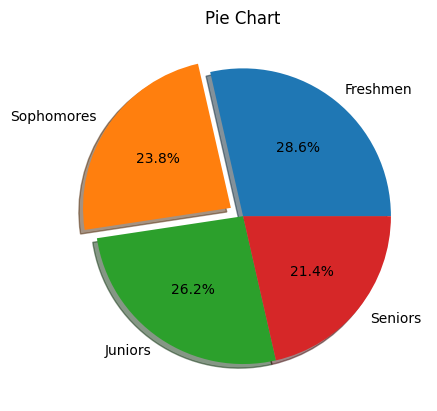

In [60]:
categories = ["Freshmen","Sophomores","Juniors","Seniors"]
values = np.array([300,250,275,225])

plt.title("Pie Chart")
plt.pie(values,labels=categories,autopct="%1.1f%%",explode=[0,0.1,0,0],shadow=True)
plt.show()
plt.show()



# Scatter graph

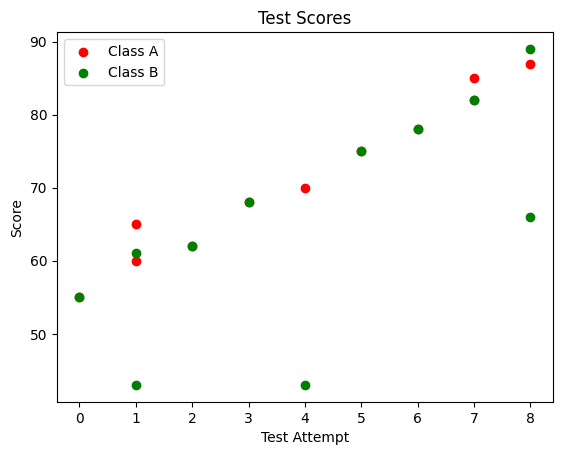

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0,1,1,2,3,4,5,6,7,7,8])
y1 = np.array([55,60,65,62,68,70,75,78,82,85,87])

x2 = np.array([0,1,1,2,3,4,5,6,7,8,8])
y2 = np.array([55,43,61,62,68,43,75,78,82,89,66])

plt.scatter(x1, y1, color="red", label="Class A")
plt.scatter(x2, y2, color="green", label="Class B")

plt.title("Test Scores")
plt.xlabel("Test Attempt")
plt.ylabel("Score")
plt.legend()
plt.show()



# Histogram

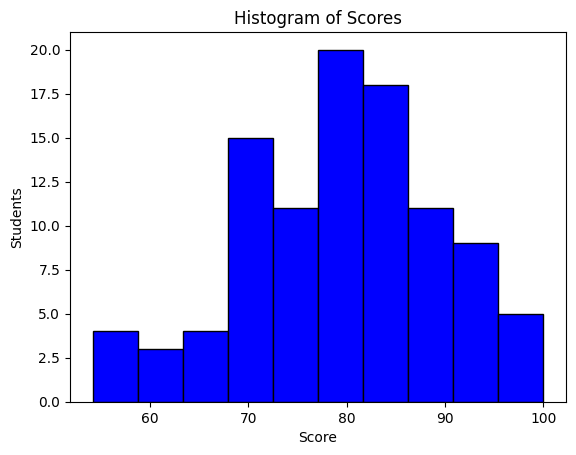

In [10]:
scores = np.random.normal(loc=80,scale=10,size=100)
scores = np.clip(scores,0,100)

plt.hist(scores,bins=10,color="blue",edgecolor="black")
plt.title("Histogram of Scores")
plt.xlabel("Score")
plt.ylabel("Students")
plt.show()